### AIR Jordan Classifier Project:

The dataset used is one from kaggle and can be found at the following link:   [https://www.kaggle.com/shreykavi/air-jordans-retro-121?select=21](https://)

The dataset is in a zip file format with each type of Jordan in its own folder. The zip file has been uploaded onto our google drive and will be loaded into colab from there.

Data Loading:

In [ ]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [ ]:
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Method of loading data taken from Tut 3b
!unzip '/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/AIR JORDAN DATASET.zip' -d '/root/datasets'

Archive:  /content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/AIR JORDAN DATASET.zip
replace /root/datasets/1/1/Air-Jordan-1-Retro-Black-Blue-2017_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# define training and test data directories
data_dir = '/root/datasets'

# classes are folders in each directory with these names
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
           '14', '15', '16', '17', '18', '19', '20', '21']

In [90]:
# load and transform data using ImageFolder

# resize all images to 600 x 600
#data_transform = transforms.Compose([transforms.RandomResizedCrop(600), 
                                      #transforms.ToTensor()])
data_transform = transforms.Compose([transforms.CenterCrop(600), 
                                      transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=data_transform)

# print out some data stats
print('Num images: ', len(dataset))

# Prepare Dataloader
batch_size = 32
num_workers = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)


Num images:  10012


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


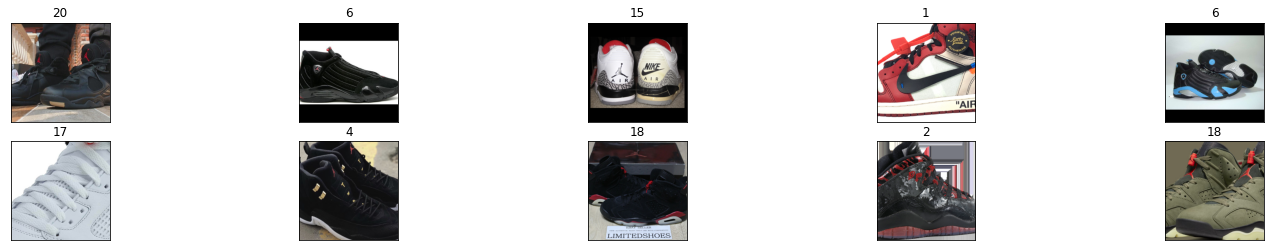

In [102]:
#THIS CODE ONLY WORKS OCASIONALLY WHEN ONE OF THE IMAGES IS NOT ONE THAT RAISES AN ERROR DUE TO NOT FINDING IT
#Based on the number of times i've ran this and the number of times its worked,
#The ratio of images that work to not work is not looking too good
# Verification Step - obtain one batch of images

dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
           '14', '15', '16', '17', '18', '19', '20', '21']

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

#IMPORTANT NOTE
#THE ABOVE DOES NOT SPLIT THE DATA

Quick Note: Based on the above images, there is gonna have to be some pre-processing where we center the shoe somehow. 400 x 400 size seemed too small as there was a lot of shoes being cut out. 600 x 600 seems reasonable but there are definitely images that are smaller

In [ ]:
#it looks like it fails in multiple places
#Fails on the 50th image, when I went to the dataset on our drive, this images preview wasnt on there
#Seems like it may be an issue where some images from the dataset are corrupted or just not being loaded right
#Tried both the zip file and the folders in the drive and both give this error at the same point which starts at shoe 50
for idx, (data, image) in enumerate(dataset): 
  print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


UnidentifiedImageError: ignored

Method 2 of DataLoading:
Uploading the file

In [ ]:
# load Jordan zip file to Google Colab
#Trying this to see if uploading the zip file straight here rather than pulling 
#it from drive helps with the issue found above
#Takes a lifetime to load. Gonna be a pain in the ass if it takes this long every time
from google.colab import files
uploaded = files.upload()

Saving AIR JORDAN DATASET.zip to AIR JORDAN DATASET.zip
